In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df_pow = pd.read_pickle('/mnt/data-r6/ahilan/dataset/neoen/process/pow_inv-32-A_5min.pkl')
df_met_nasa_pred = pd.read_pickle('/home/ahilan/gen-research/neoen-site/data/neoen_weather_nasa_sat_data_and_predicted_data.pkl')

df_pow.set_index('time', inplace=True)
df_neoen_measured_power = df_pow[['power']]

df_neoen_measured_power = df_neoen_measured_power.shift(periods=-90, freq='T')
df_neoen_measured_power.loc['2020-04-05':'2020-10-03', 'power'] = df_neoen_measured_power.loc['2020-04-05':'2020-10-03', 'power'].shift(periods=60, freq='T')
df_neoen_measured_power.loc['2021-04-04':'2021-10-02', 'power'] = df_neoen_measured_power.loc['2021-04-04':'2021-10-02', 'power'].shift(periods=60, freq='T')
df_neoen_measured_power.loc['2022-04-03':'2022-10-01', 'power'] = df_neoen_measured_power.loc['2022-04-03':'2022-10-01', 'power'].shift(periods=60, freq='T')
df_neoen_measured_power.loc['2023-04-02':'2023-09-30', 'power'] = df_neoen_measured_power.loc['2023-04-02':'2023-09-30', 'power'].shift(periods=60, freq='T')

df_neoen_measured_power = df_neoen_measured_power.resample('H').mean()

df_met_nasa = df_met_nasa_pred[['POA_nasa','Tmod_nasa']]
df_met_pred = df_met_nasa_pred[['POA_pred','Tmod_pred']]


df_neoen_pow_met_nasa = pd.merge(df_neoen_measured_power, df_met_nasa, left_index=True, right_index=True)
df_neoen_pow_met_pred = pd.merge(df_neoen_measured_power, df_met_pred, left_index=True, right_index=True)


print(df_neoen_pow_met_nasa.columns)
print(df_neoen_pow_met_nasa.shape)

Index(['power', 'POA_nasa', 'Tmod_nasa'], dtype='object')
(30698, 3)


In [3]:
# Define the morning hour range
#start_hour = 6
#end_hour = 21
# Filter rows based on morning hour range
#df_neoen_pow_met_nasa = df_neoen_pow_met_nasa[(df_neoen_pow_met_nasa.index.hour >= start_hour) & (df_neoen_pow_met_nasa.index.hour < end_hour)]
#print(df_neoen_pow_met_nasa.shape)


In [4]:
#df_neoen_pow_met_nasa = df_neoen_pow_met_nasa[df_neoen_pow_met_nasa['POA_nasa']>0]
#df_neoen_pow_met_nasa = df_neoen_pow_met_nasa[df_neoen_pow_met_nasa['power']>0]
#print(df_neoen_pow_met_nasa.shape)

#df = df_neoen_pow_met_nasa

In [5]:
df = df_neoen_pow_met_nasa

# Solar panel = JKM345M-72-V x 5742 panels
POA_std = 1000
Capacity = 5742*345/1000000
T_std = 25 
#T_std = df['Tmod'].mean()
alpha = -0.004

'''
start_date = '2023-11-20'
end_date = '2023-11-22'

test = (df['Power'][start_date:end_date])/(Capacity*(1 + alpha*(df['Tmod'][start_date:end_date] - T_std))*df['POA'][start_date:end_date]/POA_std)
print(test)
test.replace([np.inf, -np.inf], np.nan, inplace=True)
temp = test.dropna()
P_constant = np.mean(temp[temp>0])
P_constant = np.mean(temp)
print(P_constant)
'''


df['shifted_power'] = df['power'] 

P_constant = 1.0
df['power_calculated'] = P_constant*Capacity*(1 + alpha*(df['Tmod_nasa'] - T_std))*df['POA_nasa']/POA_std
df['power_error'] = df['power_calculated'] - df['shifted_power']
df['power_ratio'] = df['shifted_power']/df['power_calculated']


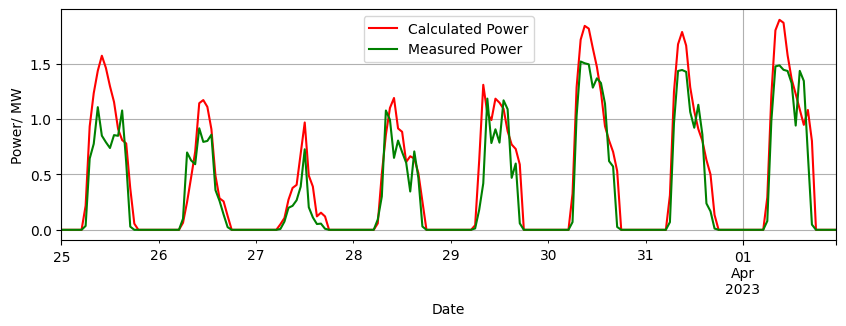

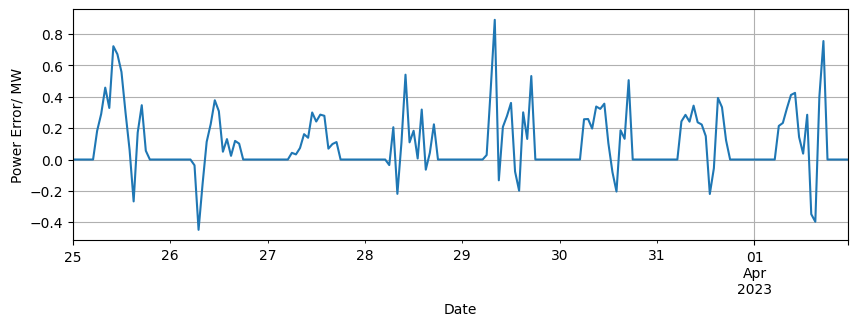

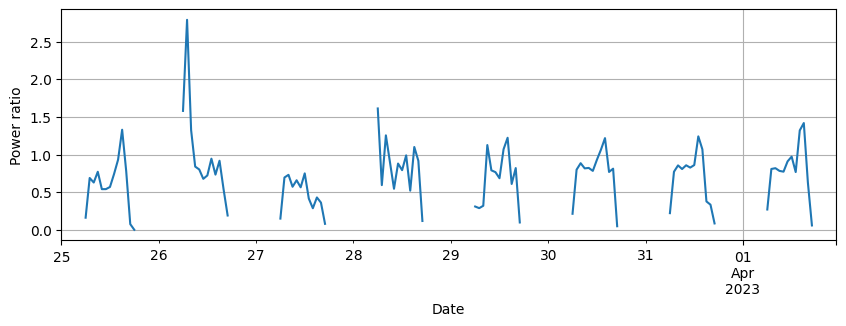

In [6]:
# Define the period you want to plot
start_date = '2023-03-25'
end_date = '2023-04-01'

#start_date = df.index.min()
#end_date = df.index.max()


# Slice the DataFrame based on the specified period
df_period = df[start_date:end_date]
df_period['power_calculated'].resample('H').mean().plot(figsize=(10, 3), color =['Red'],label='Calculated Power')
df_period['shifted_power'][start_date:end_date].resample('H').mean().plot(figsize=(10, 3), color =['Green'],label='Measured Power')
plt.ylabel('Power/ MW')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()

#ax = df_period['Power'].resample('5min').mean().plot(figsize=(10, 3))
#plt.ylabel('Measured Power/ MW')
#plt.xlabel('Date')
#plt.grid(True)
#plt.show()

#ax = df_period['Power_calculated'].resample('5min').mean().plot(figsize=(10, 3))
#plt.ylabel('Calculated Power/ MW')
#plt.xlabel('Date')
#plt.grid(True)
#plt.show()

ax = df_period['power_error'].resample('H').mean().plot(figsize=(10, 3))
plt.ylabel('Power Error/ MW')
plt.xlabel('Date')
plt.grid(True)
plt.show()

ax = df_period['power_ratio'].resample('H').mean().plot(figsize=(10, 3))
plt.ylabel('Power ratio')
plt.xlabel('Date')
plt.grid(True)
plt.show()


In [7]:
df.shape

(30698, 7)

In [8]:
df.describe()

/home/ahilan/kernels/default/.venv/lib/python3.8/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,power,POA_nasa,Tmod_nasa,shifted_power,power_calculated,power_error,power_ratio
count,30694.000000,30698.000000,30698.000000,30694.000000,30698.000000,30694.000000,2.902500e+04
mean,0.354430,282.618619,21.270055,0.354430,0.541825,0.187465,inf
std,0.543719,345.922804,11.953199,0.543719,0.653158,0.395757,NaN
min,0.000000,0.000000,-0.890000,0.000000,0.000000,-1.378296,0.000000e+00
25%,0.000044,0.000000,11.830000,0.000044,0.000000,-0.000055,6.008995e-01
50%,0.000065,61.179577,19.177306,0.000065,0.124446,-0.000030,1.177227e+00
75%,0.639571,562.232666,28.313748,0.639571,1.094551,0.288681,NaN
max,1.700066,1126.833681,62.363270,1.700066,2.175250,2.142230,inf


In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse
from tensorflow.keras import backend as K
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint

# Example: Generate synthetic time series data (replace with your own data loading)
np.random.seed(42)

# Define the period you want to plot
start_date = df.index.min()
end_date = df.index.max()

temp = df[start_date:end_date][['power_calculated','power']].resample('H').mean()
print(temp.isnull().any().any())
print(np.any(np.isinf(temp)))
print(temp.shape)
temp_cleaned = temp.dropna()
print(temp_cleaned.shape)
data = temp_cleaned.values
print(temp_cleaned.index)

2024-08-02 08:22:46.401625: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-02 08:22:46.599882: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-02 08:22:49.493203: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


True
False
(30698, 2)
(30694, 2)
DatetimeIndex(['2020-07-31 23:00:00', '2020-08-01 00:00:00',
               '2020-08-01 01:00:00', '2020-08-01 02:00:00',
               '2020-08-01 03:00:00', '2020-08-01 04:00:00',
               '2020-08-01 05:00:00', '2020-08-01 06:00:00',
               '2020-08-01 07:00:00', '2020-08-01 08:00:00',
               ...
               '2024-01-31 14:00:00', '2024-01-31 15:00:00',
               '2024-01-31 16:00:00', '2024-01-31 17:00:00',
               '2024-01-31 18:00:00', '2024-01-31 19:00:00',
               '2024-01-31 20:00:00', '2024-01-31 21:00:00',
               '2024-01-31 22:00:00', '2024-01-31 23:00:00'],
              dtype='datetime64[ns]', length=30694, freq=None)


In [11]:
# Normalize data
#scaler = MinMaxScaler()
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

In [ ]:
# Create sequences/windows
'''
timesteps = 5 # Length of each sequence/window
num_sequences = len(data_normalized) - timesteps + 1

# Initialize an array to hold the sequences
sequences = np.zeros((num_sequences, timesteps, 1))

for i in range(num_sequences):
    sequences[i] = data_normalized[i:i + timesteps].reshape(-1, 1)

# Print the shape of the resulting three-dimensional array
print("Shape of the sequences array:", sequences.shape)
'''


# Create sequences for LSTM
def create_sequences(data, timesteps):
    sequences = []
    for i in range(len(data) - timesteps):
        seq = data[i:i + timesteps]
        sequences.append(seq)
    return np.array(sequences)


# Train-test split
#X_train, X_test = train_test_split(sequences, test_size=0.2, random_state=42)

# Define the split ratio
train_ratio = 1.0
test_ratio = 0.0
num_train_samples = int(train_ratio * len(data_normalized))

# Split the data
train_data = data_normalized[:num_train_samples]
test_data = data_normalized[num_train_samples:]

train_data_date = temp_cleaned.index[:num_train_samples]
test_data_date = temp_cleaned.index[num_train_samples:]


timesteps = 24  # Example sequence leng|th
train_sequences = create_sequences(train_data, timesteps)
test_sequences = create_sequences(test_data, timesteps)

print("Shape of the train sequences array:", train_sequences.shape)
print("Shape of the test sequences array:", test_sequences.shape)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Attention, Concatenate, Dropout

# Function to sample from the latent space
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

# Hyperparameters
input_dim = 1   
latent_dim = 20
dropout_rate = 0.2


# Encoder
inputs = Input(shape=(timesteps, input_dim),name='encoder_input')
h = LSTM(64, return_sequences=True,dropout=dropout_rate, recurrent_dropout=dropout_rate,name='encoder_lstm1')(inputs)
h = LSTM(32,name='encoder_lstm2')(h)
z_mean = Dense(latent_dim,name='z_mean')(h)
z_log_var = Dense(latent_dim,name='z_log_var')(h)
z = Lambda(sampling, output_shape=(latent_dim,),name='z')([z_mean, z_log_var])

# Decoder
#decoder_h1 = Dense(64)
decoder_repeat = RepeatVector(timesteps,name='decoder_repeat')
decoder_h2 = LSTM(32, return_sequences=True,name='decoder_lstm1')
decoder_lstm = LSTM(64, return_sequences=True, dropout=dropout_rate, recurrent_dropout=dropout_rate,name='decoder_lstm2')
decoder_output = TimeDistributed(Dense(input_dim),name='decoder_output')

#z = decoder_h1(z)
h_decoded = decoder_repeat(z)
h_decoded = decoder_h2(h_decoded)
x_decoded_mean = decoder_lstm(h_decoded)
x_decoded_mean = decoder_output(x_decoded_mean)


'''
# Encoder
inputs = Input(shape=(timesteps, input_dim),name='encoder_input')
lstm = LSTM(64, return_sequences=True, name='encoder_lstm1')(inputs)
lstm = Dropout(0.2, name='encoder_dropout1')(lstm)
lstm = LSTM(64, return_sequences=True, name='encoder_lstm2')(lstm)
lstm = Dropout(0.2, name='encoder_dropout2')(lstm)
attention = Attention(name='encoder_attention')(lstm)
concat = Concatenate(name='encoder_concat')([lstm, attention])
lstm_out = LSTM(64, name='encoder_lstm3')(concat)
lstm_out = Dropout(0.2, name='encoder_dropout3')(lstm_out)
z_mean = Dense(latent_dim, name='z_mean')(lstm_out)
z_log_var = Dense(latent_dim, name='z_log_var')(lstm_out)
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])


# Decoder
#    decoder_input = Input(shape=(latent_dim,), name='decoder_input')
decoder_repeat = RepeatVector(timesteps, name='decoder_repeat')(decoder_input)
decoder_lstm1 = LSTM(64, return_sequences=True, name='decoder_lstm1')(decoder_repeat)
decoder_lstm2 = LSTM(64, return_sequences=True, name='decoder_lstm2')(decoder_lstm1)
x_decoded_mean = TimeDistributed(Dense(input_dim), name='decoder_output')(decoder_lstm2)
'''


# VAE model
vae = Model(inputs, x_decoded_mean, name='vae')

# Loss function
reconstruction_loss = mse(K.flatten(inputs), K.flatten(x_decoded_mean))
reconstruction_loss *= timesteps * input_dim
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + 0.15*kl_loss)
vae.add_loss(vae_loss)

batch_size = 64

checkpoint_callback = ModelCheckpoint(
    filepath='/home/ahilan/gen-research/neoen-site/models/anomaly_detection/power_calculated/neoen_three_year_sat_weather_data/model_checkpoint_{epoch:02d}.h5',  # Save with epoch and batch number in the filename
    save_weights_only=False,  # Set to True if you only want to save the model weights
    save_freq=5 * len(train_sequences) // batch_size,  # Change this to 'batch' to save after every batch
    verbose=1  # Set to 1 for verbose logging, 0 for silent
)

early_stopping_callback = EarlyStopping(
    monitor='val_loss', # Monitor the validation loss
    patience=10, # Stop after 10 epochs of no improvement
    verbose=1
)

# Compile model
optimizer = Adam(learning_rate=1e-3)
vae.compile(optimizer=optimizer)
vae.summary()


# Train the VAE with early stopping
history = vae.fit(train_sequences[:,:,1], epochs=200, batch_size=64, validation_split=0.2, callbacks=[early_stopping_callback, checkpoint_callback])


# Plot training & validation loss values
#plt.plot(history.history['loss'])
#plt.title('Model loss')
#plt.xlabel('Epoch')
#plt.ylabel('Loss')
#plt.legend(['Train'], loc='upper right')
#plt.show()

## Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
vae = tf.keras.models.load_model('/home/ahilan/gen-research/neoen-site/models/anomaly_detection/power_calculated/neoen_three_year_sat_weather_data/model_checkpoint_32.h5')
for layer in vae.layers:
    print(layer.name)

inputs = vae.get_layer('encoder_input').input
z_mean = vae.get_layer('z_mean').output


In [ ]:
encoder = Model(inputs, z_mean)
encoded_data = encoder.predict(train_sequences[:,:,1])

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(encoded_data)

plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.title('t-SNE projection of 20-dimensional latent space')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()


## Encode and decode some data points
#encoder = Model(inputs, z_mean)
#encoded_data = encoder.predict(train_sequences)

# Display some of the encoded data
#plt.scatter(encoded_data[:, 0], encoded_data[:, 1])
#plt.xlabel("Dimension 1")
#plt.ylabel("Dimension 2")
#plt.title("Encoded Data")
#plt.show()


In [ ]:
from sklearn.cluster import KMeans
# Determine optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(encoded_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fit K-Means with optimal clusters
np.random.seed(42)
optimal_clusters = 4  # Example
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(encoded_data)

plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=clusters)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.title('KMean Clustering in Latent Space')
plt.show()



'''
from sklearn.mixture import GaussianMixture
# Fit GMM to the latent space
gmm = GaussianMixture(n_components=4, random_state=0).fit(encoded_data)

# Assign cluster labels and get probabilities
clusters = gmm.predict(encoded_data)
probabilities = gmm.predict_proba(encoded_data)

# Visualize the clusters in the latent space (for 2D or 3D latent space)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=clusters)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.title('GMM Clustering in Latent Space')
plt.show()


#from sklearn.cluster import DBSCAN
#dbscan = DBSCAN(eps=0.5, min_samples=5).fit(encoded_data)
#clusters = dbscan.labels_

# Visualize the clusters in the latent space (for 2D or 3D latent space)
#plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=clusters)
#plt.xlabel('Latent Dimension 1')
#plt.ylabel('Latent Dimension 2')
#plt.title('DBSCAN Clustering in Latent Space')
#plt.show()
'''

In [ ]:
reconstructed_sequences = vae.predict(train_sequences[:,:,1])

In [ ]:
# 1. Reshape sequences back to original form
original_shape = (len(data), 2)
reconstructed_original_data = np.zeros(original_shape)
reconstructed_vae_data = np.zeros(original_shape)

for i in range(len(train_sequences) - timesteps):
    reconstructed_original_data[i:i + timesteps] = train_sequences[i]
    reconstructed_vae_data[i:i + timesteps] = reconstructed_sequences[i]


X_test_original = scaler.inverse_transform(reconstructed_original_data)
X_test_vae = scaler.inverse_transform(reconstructed_vae_data)

df_orginal = pd.DataFrame(data = X_test_original, index = train_data_date, columns = ['Power','Power_error'])
df_vae_output = pd.DataFrame(data = X_test_vae, index = train_data_date, columns = ['Power','Power_error'])

# Define the period you want to plot
start_date = '2023-05-22'
end_date = '2023-05-25'

# Slice the DataFrame based on the specified period
df_orginal_period = df_orginal[start_date:end_date]
df_vae_output_period = df_vae_output[start_date:end_date]


df_orginal_period['Power_error'].resample('H').mean().plot(figsize=(10, 3), color =['Red'],label='Original power data')
df_vae_output_period['Power_error'].resample('H').mean().plot(figsize=(10, 3),color =['Black'],label='VAE generated data')
plt.ylabel('Power/ MW')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
array_b = np.zeros((30670, 24, 1))
reconstructed_sequences_temp = np.concatenate([reconstructed_sequences,array_b], axis=-1) 
reconstructed_sequences_temp[:,:,1] = train_sequences[:,:,1]

# Add cluster labels to the original sequences
clusters_temp = np.repeat(clusters[:, None, None], train_sequences.shape[1], axis=1)
original_sequences_with_clusters = np.concatenate([train_sequences, clusters_temp], axis=-1)
reconstructed_sequences_with_clusters = np.concatenate([reconstructed_sequences_temp, clusters_temp], axis=-1)


# Initialize an array to hold cluster IDs for the entire time series
cluster_ids = np.full(len(train_data), -1)


for i in range(len(train_sequences)):
    start_idx = i * timesteps
    end_idx = start_idx + timesteps
    cluster_ids[start_idx:end_idx] = clusters[i]

# Create a copy of cluster_ids to update with the most frequent cluster ID
updated_cluster_ids = cluster_ids.copy()
# Handle the overlapping indices by assigning the most frequent cluster ID
for i in range(len(cluster_ids) - timesteps + 1):
    window = cluster_ids[i:i + timesteps]
    unique, counts = np.unique(window[window != -1], return_counts=True)  # Ignore unassigned (-1) values
    if len(unique) > 0:  # Ensure there are assigned values in the window
        most_frequent_cluster = unique[np.argmax(counts)]
        updated_cluster_ids[i:i + timesteps] = most_frequent_cluster

cluster_ids = updated_cluster_ids

# Ensure the cluster_ids array has the same length as the original time series
cluster_ids = cluster_ids[:len(train_data)]



# 1. Reshape sequences back to original form
original_shape = (len(train_data), 3)
reconstructed_shape = (len(train_data), 3)
reconstructed_original_data = np.zeros(original_shape)
reconstructed_vae_data = np.zeros(reconstructed_shape)

for i in range(len(train_sequences) - timesteps):
    reconstructed_original_data[i:i + timesteps] = original_sequences_with_clusters[i]
    reconstructed_vae_data[i:i + timesteps] = reconstructed_sequences_with_clusters[i]


reconstructed_original_data[:,0:2] = scaler.inverse_transform(reconstructed_original_data[:,0:2])
reconstructed_vae_data[:,0:2] = scaler.inverse_transform(reconstructed_vae_data[:,0:2])


df_orginal = pd.DataFrame(data = reconstructed_original_data, index = train_data_date, columns = ['Power','Power_error','Clusters'])
df_vae_output = pd.DataFrame(data = reconstructed_vae_data, index = train_data_date, columns = ['Power_error','Power','Clusters'])


df_orginal['Clusters'] = cluster_ids


In [ ]:
start_date = '2022-01-22'
end_date = '2022-02-22'

df_orginal['Power_error'][start_date:end_date].resample('H').mean().plot(figsize=(15, 4), color =['Blue'],label='Residual Power')
plt.ylabel('Power/ MW')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()


# Check if clusters exist in the date range
for cluster in range(7):
    cluster_data = df_orginal.query('Clusters == @cluster')[start_date:end_date]
    if not cluster_data.empty:
        cluster_data['Power_error'].resample('H').mean().plot(
            figsize=(15, 4),
            color=['Red', 'Black', 'Green', 'Yellow','Pink','Magenta','Cyan'][cluster],
            label=f'Cluster {cluster}'
        )


# Add labels, grid, and legend
plt.ylabel('Residual power')
plt.xlabel('Date')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
'''
array_b = np.zeros((30670, 24, 1))
reconstructed_sequences_temp = np.concatenate([reconstructed_sequences,array_b], axis=-1) 
reconstructed_sequences_temp[:,:,1] = train_sequences[:,:,1]

# Add cluster labels to the original sequences
clusters_temp = np.repeat(clusters[:, None, None], train_sequences.shape[1], axis=1)
original_sequences_with_clusters = np.concatenate([train_sequences, clusters_temp], axis=-1)
reconstructed_sequences_with_clusters = np.concatenate([reconstructed_sequences_temp, clusters_temp], axis=-1)

'''
# Initialize an array to hold cluster IDs for the entire time series
cluster_ids = np.full(len(train_data), -1)

# Map each sequence's cluster ID back to the corresponding indices in the original time series
for i in range(len(train_sequences)):
    cluster_ids[i:i+timesteps] = clusters[i]

# Handle the overlapping indices by assigning the most frequent cluster ID
for i in range(timesteps):
    unique, counts = np.unique(cluster_ids[i:i+timesteps], return_counts=True)
    most_frequent_cluster = unique[np.argmax(counts)]
    cluster_ids[i:i+timesteps] = most_frequent_cluster

# Ensure the cluster_ids array has the same length as the original time series
cluster_ids = cluster_ids[:len(train_data)]

print(clusters)
print(cluster_ids)

def plot_time_series_with_clusters(data, cluster_ids, n_clusters):
    plt.figure(figsize=(15, 8))
    for cluster_id in range(n_clusters):
        plt.plot(data[cluster_ids == cluster_id], label=f'Cluster {cluster_id}')
    plt.xlabel('Time')
    plt.ylabel('Normalized Value')
    plt.title('Time Series with Cluster IDs')
    plt.legend()
    plt.show()
'''


# Initialize the array to hold cluster IDs for the entire time series
cluster_ids = np.full(len(train_data), -1)


# Map each sequence's cluster ID back to the corresponding indices in the original time series
for i in range(len(train_sequences)):
    start_idx = i * timesteps
    end_idx = start_idx + timesteps
    cluster_ids[start_idx:end_idx] = clusters[i]

# Create a copy of cluster_ids to update with the most frequent cluster ID
updated_cluster_ids = cluster_ids.copy()

'''
# Handle the overlapping indices by assigning the most frequent cluster ID
for i in range(len(cluster_ids) - timesteps + 1):
    window = cluster_ids[i:i + timesteps]
    unique, counts = np.unique(window[window != -1], return_counts=True)  # Ignore unassigned (-1) values
    if len(unique) > 0:  # Ensure there are assigned values in the window
        most_frequent_cluster = unique[np.argmax(counts)]
        updated_cluster_ids[i:i + timesteps] = most_frequent_cluster
'''

# Ensure the updated_cluster_ids array has the same length as the original time series
updated_cluster_ids = updated_cluster_ids[:len(train_data)]

#for i in range(len(updated_cluster_ids)):
#    print(updated_cluster_ids[i])



# 1. Reshape sequences back to original form
original_shape = (len(train_data), 3)
reconstructed_shape = (len(train_data), 3)
reconstructed_original_data = np.zeros(original_shape)
reconstructed_vae_data = np.zeros(reconstructed_shape)

for i in range(len(train_sequences) - timesteps):
    reconstructed_original_data[i:i + timesteps] = original_sequences_with_clusters[i]
    reconstructed_vae_data[i:i + timesteps] = reconstructed_sequences_with_clusters[i]


reconstructed_original_data[:,0:2] = scaler.inverse_transform(reconstructed_original_data[:,0:2])
reconstructed_vae_data[:,0:2] = scaler.inverse_transform(reconstructed_vae_data[:,0:2])


df_orginal = pd.DataFrame(data = reconstructed_original_data, index = train_data_date, columns = ['Power','Power_error','Clusters'])
df_vae_output = pd.DataFrame(data = reconstructed_vae_data, index = train_data_date, columns = ['Power_error','Power','Clusters'])

#df_orginal['Clusters'] = updated_cluster_ids
#df_vae_output['Clusters'] = updated_cluster_ids


#print(df_orginal.shape)
#print(df_orginal)
#print(df_vae_output.shape)

start_date = '2023-05-14'
end_date = '2023-05-22'

print(df_orginal)
df_orginal['Power_error'][start_date:end_date].resample('H').mean().plot(figsize=(15, 4), color =['Blue'],label='Residual power')
plt.ylabel('Power/ MW')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()




# Check if clusters exist in the date range
for cluster in range(4):
    cluster_data = df_orginal.query('Clusters == @cluster')[start_date:end_date]
    if not cluster_data.empty:
        cluster_data['Power_error'].resample('H').mean().plot(
            figsize=(15, 4),
            color=['Red', 'Black', 'Green', 'Yellow'][cluster],
            label=f'Cluster {cluster}'
        )
    else:
        print('cluster is empty')

# Add labels, grid, and legend
plt.ylabel('Residual power')
plt.xlabel('Date')
plt.grid(True)
plt.legend()
plt.show()

'''
df_orginal['Power_error'][df_orginal['Clusters']==0][start_date:end_date].resample('H').mean().plot(figsize=(15, 4), color =['Red'])
df_orginal['Power_error'][df_orginal['Clusters']==1][start_date:end_date].resample('H').mean().plot(figsize=(15, 4), color =['Black'])
df_orginal['Power_error'][df_orginal['Clusters']==2][start_date:end_date].resample('H').mean().plot(figsize=(15, 4), color =['Green'])
df_orginal['Power_error'][df_orginal['Clusters']==3][start_date:end_date].resample('H').mean().plot(figsize=(15, 4), color =['Yellow'])
plt.ylabel('Power Ratio')
plt.xlabel('Date')
plt.grid(True)
plt.show()
'''

'''
print(df_orginal)
df_orginal['Power'][start_date:end_date].resample('H').mean().plot(figsize=(10, 3), color =['Red'],label='Original power data')
plt.ylabel('Power/ MW')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()

df_orginal['Power'][df_orginal['Clusters']==0][start_date:end_date].resample('H').mean().plot(figsize=(10, 3), color =['Red'])
df_orginal['Power'][df_orginal['Clusters']==1][start_date:end_date].resample('H').mean().plot(figsize=(10, 3), color =['Black'])
df_orginal['Power'][df_orginal['Clusters']==2][start_date:end_date].resample('H').mean().plot(figsize=(10, 3), color =['Green'])
df_orginal['Power'][df_orginal['Clusters']==3][start_date:end_date].resample('H').mean().plot(figsize=(10, 3), color =['Blue'])
plt.ylabel('Power/ MW')
plt.xlabel('Date')
plt.grid(True)
plt.show()


#df_vae_output['Power_error'][df_vae_output['Clusters']==0][start_date:end_date].resample('H').mean().plot(figsize=(10, 3), color =['Blue'])
#df_vae_output['Power_error'][df_vae_output['Clusters']==1][start_date:end_date].resample('H').mean().plot(figsize=(10, 3), color =['Red'])
#df_vae_output['Power_error'][df_vae_output['Clusters']==2][start_date:end_date].resample('H').mean().plot(figsize=(10, 3), color =['Green'])
#df_vae_output['Power_error'][df_vae_output['Clusters']==3][start_date:end_date].resample('H').mean().plot(figsize=(10, 3), color =['Black'])
#plt.ylabel('Power/ MW')
#plt.xlabel('Date')
#plt.grid(True)
#plt.show()
'''

'''
print(train_data.shape)
plot_time_series_with_clusters(train_data[:,], cluster_ids, n_clusters)
'''

In [ ]:
data = train_data
data_sequences = train_sequences
date_index = train_data_date

reconstructed_sequences = vae.predict(data_sequences)

# 1. Reshape sequences back to original form
original_shape = (len(data), 1)
reconstructed_original_data = np.zeros(original_shape)
reconstructed_vae_data = np.zeros(original_shape)

for i in range(len(data_sequences) - timesteps):
    reconstructed_original_data[i:i + timesteps] = data_sequences[i]
    reconstructed_vae_data[i:i + timesteps] = reconstructed_sequences[i]


X_test_original = scaler.inverse_transform(reconstructed_original_data)
X_test_vae = scaler.inverse_transform(reconstructed_vae_data)

df_orginal = pd.DataFrame(data = X_test_original, index = date_index, columns = ['Power_error'])
df_vae_output = pd.DataFrame(data = X_test_vae, index = date_index, columns = ['Power_error'])


In [ ]:
# Define the period you want to plot
start_date = '2023-04-22'
end_date = '2023-05-25'

# Slice the DataFrame based on the specified period
df_orginal_period = df_orginal[start_date:end_date]
df_vae_output_period = df_vae_output[start_date:end_date]


df_orginal_period['Power_error'].resample('5min').mean().plot(figsize=(10, 3), color =['Red'],label='Original power data')
df_vae_output_period['Power_error'].resample('5min').mean().plot(figsize=(10, 3),color =['Black'],label='VAE generated data')
plt.ylabel('Power/ MW')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()



'''
df_period['POA'].resample('H').mean().plot(figsize=(5, 4))
plt.ylabel('POA/ WM$^{-2}$')
plt.xlabel('Date')
plt.grid(True)
plt.show()

df_period['Power'].resample('H').mean().plot(figsize=(5, 4))
plt.ylabel('Power/ MW')
plt.xlabel('Date')
plt.grid(True)
plt.show()
'''